## Calculating the chi-square for a distribution and a histogram.

We will do it two ways. With and without normalized histograms

In [1]:
%pylab inline --no-import-all
from scipy.stats import norm #will use this for plotting

Populating the interactive namespace from numpy and matplotlib


### make some data from a N(0,1) distribution

In [2]:
n_bins = 50
x = norm.rvs(size=10000)

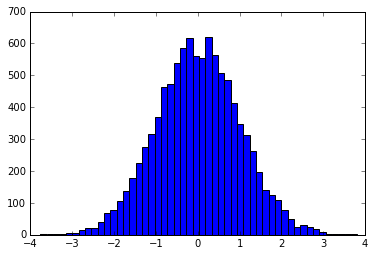

In [4]:
counts, bins, patches = plt.hist(x, bins=n_bins,normed=False)

## Get Bin centers

Get the location for the bin centers. Here I do it step by step so you can see what is going on.

In [5]:
# all bins edges
bins

array([-3.75518813, -3.60372897, -3.45226981, -3.30081065, -3.1493515 ,
       -2.99789234, -2.84643318, -2.69497402, -2.54351486, -2.3920557 ,
       -2.24059654, -2.08913738, -1.93767822, -1.78621906, -1.6347599 ,
       -1.48330074, -1.33184158, -1.18038242, -1.02892326, -0.87746411,
       -0.72600495, -0.57454579, -0.42308663, -0.27162747, -0.12016831,
        0.03129085,  0.18275001,  0.33420917,  0.48566833,  0.63712749,
        0.78858665,  0.94004581,  1.09150497,  1.24296413,  1.39442328,
        1.54588244,  1.6973416 ,  1.84880076,  2.00025992,  2.15171908,
        2.30317824,  2.4546374 ,  2.60609656,  2.75755572,  2.90901488,
        3.06047404,  3.2119332 ,  3.36339236,  3.51485152,  3.66631068,
        3.81776983])

In [6]:
right_edges = bins[1:]
right_edges

array([-3.60372897, -3.45226981, -3.30081065, -3.1493515 , -2.99789234,
       -2.84643318, -2.69497402, -2.54351486, -2.3920557 , -2.24059654,
       -2.08913738, -1.93767822, -1.78621906, -1.6347599 , -1.48330074,
       -1.33184158, -1.18038242, -1.02892326, -0.87746411, -0.72600495,
       -0.57454579, -0.42308663, -0.27162747, -0.12016831,  0.03129085,
        0.18275001,  0.33420917,  0.48566833,  0.63712749,  0.78858665,
        0.94004581,  1.09150497,  1.24296413,  1.39442328,  1.54588244,
        1.6973416 ,  1.84880076,  2.00025992,  2.15171908,  2.30317824,
        2.4546374 ,  2.60609656,  2.75755572,  2.90901488,  3.06047404,
        3.2119332 ,  3.36339236,  3.51485152,  3.66631068,  3.81776983])

In [7]:
left_edges = bins[:-1]
left_edges

array([-3.75518813, -3.60372897, -3.45226981, -3.30081065, -3.1493515 ,
       -2.99789234, -2.84643318, -2.69497402, -2.54351486, -2.3920557 ,
       -2.24059654, -2.08913738, -1.93767822, -1.78621906, -1.6347599 ,
       -1.48330074, -1.33184158, -1.18038242, -1.02892326, -0.87746411,
       -0.72600495, -0.57454579, -0.42308663, -0.27162747, -0.12016831,
        0.03129085,  0.18275001,  0.33420917,  0.48566833,  0.63712749,
        0.78858665,  0.94004581,  1.09150497,  1.24296413,  1.39442328,
        1.54588244,  1.6973416 ,  1.84880076,  2.00025992,  2.15171908,
        2.30317824,  2.4546374 ,  2.60609656,  2.75755572,  2.90901488,
        3.06047404,  3.2119332 ,  3.36339236,  3.51485152,  3.66631068])

In [8]:
bin_centers = (right_edges+left_edges)/2
bin_centers

array([-3.67945855, -3.52799939, -3.37654023, -3.22508108, -3.07362192,
       -2.92216276, -2.7707036 , -2.61924444, -2.46778528, -2.31632612,
       -2.16486696, -2.0134078 , -1.86194864, -1.71048948, -1.55903032,
       -1.40757116, -1.256112  , -1.10465284, -0.95319368, -0.80173453,
       -0.65027537, -0.49881621, -0.34735705, -0.19589789, -0.04443873,
        0.10702043,  0.25847959,  0.40993875,  0.56139791,  0.71285707,
        0.86431623,  1.01577539,  1.16723455,  1.31869371,  1.47015286,
        1.62161202,  1.77307118,  1.92453034,  2.0759895 ,  2.22744866,
        2.37890782,  2.53036698,  2.68182614,  2.8332853 ,  2.98474446,
        3.13620362,  3.28766278,  3.43912194,  3.5905811 ,  3.74204025])

In [9]:
bin_width = bins[1]-bins[0]

## Raw histogram counts

To go from the pdf to the expected counts in a bin, you need to include a normalization constant.

In [10]:
normalization = x.size*(bins[1]-bins[0])

In [11]:
prediction = normalization*norm.pdf(bin_centers)

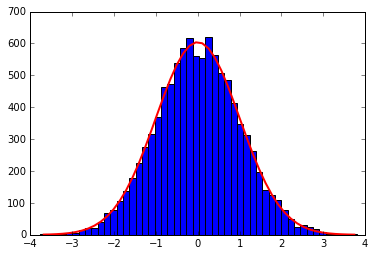

In [12]:
counts, bins, patches = plt.hist(x, bins=n_bins,normed=False)
plt.plot(bin_centers,prediction, c='r', lw=2)

In [13]:
np.sum(prediction), np.sum(counts)

(9998.4828255329667, 10000.0)

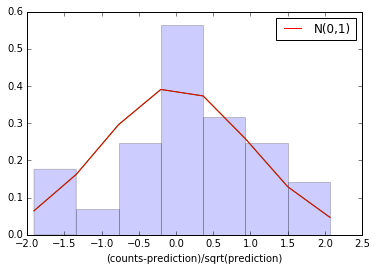

In [61]:
# make a quick plot of (counts-prediction)/sqrt(prediction)
# it should look like N(0,1) for chi-square formula to be appropriate
temp = plt.hist((counts-prediction)/np.sqrt(prediction), bins=7, normed=True, alpha=0.2)
plt.plot(temp[1], norm.pdf(temp[1]))
plt.plot(temp[1], norm.pdf(temp[1]), label='N(0,1)')
plt.legend()
plt.xlabel('(counts-prediction)/sqrt(prediction)')

## Chisquare

In [37]:
from scipy.stats import chisquare

In [38]:
from scipy.stats import chi2

In [39]:
# right way
np.sum((counts-prediction)**2/prediction)

45.498862093830645

In [41]:
# right way
chisq_obs, pvalue = chisquare(counts, prediction)
chisq_obs, pvalue

(45.498862093830645, 0.61586732424588986)

Now we can calculate the p-value for having a chi-square value this large.
Importantly we need to have the number of degrees of freedom be the number of bins.

In [44]:
#p-value
chi2.sf(chisq_obs,counts.size)

0.65436627278078441

## Note 
A p-value of 0 or 1 is very unlikely. You should expect to sit in the middle of the distribution and have a p-value of ~0.5

## Normalized Histogram (wrong way)

Here we make a normed histogram, which is equivalent to dividing by the normalization constant

In [45]:
prediction_normed = norm.pdf(bin_centers)

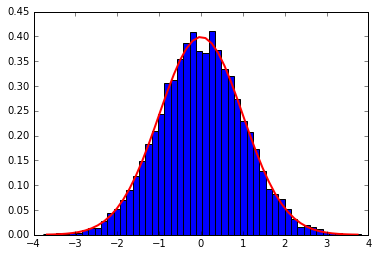

In [46]:
counts_normed, bins, patches = plt.hist(x, bins=n_bins,normed=True)
plt.plot(bin_centers,prediction_normed, c='r', lw=2)

In [51]:
# Note, they don't add up to 1., they add up to (roughly) 1/bin_width
np.sum(prediction_normed), np.sum(counts_normed)

(6.6014382152927498, 6.6024399206195126)

In [52]:
1/bin_width

6.6024399206195179

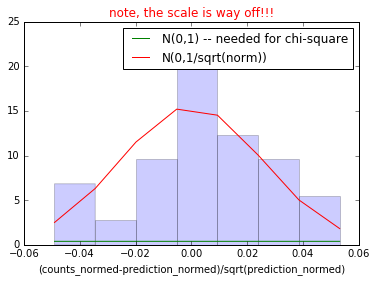

In [75]:
# make a quick plot of (counts-prediction)/sqrt(prediction)
# it should look like N(0,1) for chi-square formula to be appropriate
temp = plt.hist((counts_normed-prediction_normed)/np.sqrt(prediction_normed), bins=7, normed=True, alpha=0.2)
plt.plot(temp[1], norm.pdf(temp[1]), label='N(0,1) -- needed for chi-square')
plt.plot(temp[1], norm.pdf(temp[1], 0,1./np.sqrt(normalization)), label='N(0,1/sqrt(norm))')
plt.legend()
plt.xlabel('(counts_normed-prediction_normed)/sqrt(prediction_normed)')
plt.title('note, the scale is way off!!!', color='r')

In [62]:
#wrong way
np.sum((counts_normed-prediction_normed)**2/prediction_normed)

0.030040350343106814

In [63]:
#wrong way
chisq_obs_wrong, pvalue_wrong = chisquare(counts_normed, prediction_normed)
chisq_obs_wrong, pvalue_wrong

(0.030040350343106814, 1.0)

In [76]:
## compare with the right way
chisq_obs, pvalue

(45.498862093830645, 0.61586732424588986)

In [64]:
#p-value
chi2.sf(chisq_obs_wrong,counts.size)

1.0

## Note 
A p-value of 0 or 1 is very unlikely. You should expect to sit in the middle of the distribution and have a p-value of ~0.5